In [ ]:
import paulssonlab.deaton.trenchripper.trenchripper as tr

import warnings

warnings.filterwarnings(action="once")

import matplotlib

matplotlib.rcParams["figure.figsize"] = [20, 10]

In [2]:
headpath = "/n/scratch2/de64/2020-03-02_plasmid_loss/"
nd2file = "/n/scratch2/de64/2020-03-02_plasmid_loss/Basilisk_SJC25x2_SJC28_Losses.nd2"

## Fluorescence Segmentation

Now that you have copped your data into kymographs, we will now perform segmentation/cell detection <br>
on your kymographs. Currently, this pipeline only supports segmentation of fluorescence images; however, <br>
segmentation of transmitted light imaging techniques is in development.

The output of this step will be a set of `segmentation_[File #].hdf5` files stored in `headpath/fluorsegmentation`.<br>
The image data stored in these files takes the exact same form as the kymograph data, `(K,T,Y,X)` arrays <br>
where K is the trench index, T is time, and Y,X are the crop dimensions. These arrays are accessible using <br>
keys of the form `"[Trench Row Number]"`.

Since no metadata is generated by this step, it is possible to use another segmentation algorithm on the kymograph <br>
data. The output of segmentation must be split into `segmentation_[File #].hdf5` files, where `[File #]` agrees with the<br>
corresponding `kymograph_[File #].hdf5` file. Additionally, the `(K,T,Y,X)` arrays must be of the same shape as the <br>
kymograph arrays and accessible at the corresponding `"[Trench Row Number]"` key. These files must be placed into <br>
their own folder at `headpath/foldername`. This folder may then be used in later steps.

### Test Parameters

##### Initialize the interactive segmentation class

As a first step, initialize the `tr.fluo_segmentation_interactive` class that will be handling all steps of generating a segmentation. 

In [1]:
interactive_segmentation = tr.fluo_segmentation_interactive(headpath)

NameError: name 'tr' is not defined

##### Choose channel to segment on

In [2]:
interactive_segmentation.choose_seg_channel_inter()

NameError: name 'interactive_segmentation' is not defined

#### Import data

Fill in 

You will need to tune the following `args` and `kwargs` (in order):

**fov_idx (int)** :

**n_trenches (int)** :

**t_range (tuple)** :

**t_subsample_step (int)** :

In [5]:
interactive_segmentation.import_array_inter()

interactive(children=(IntText(value=12, description='Number of trenches:'), IntRangeSlider(value=(0, 274), des…

#### Scale data

Fill in 

You will need to tune the following `args` and `kwargs` (in order):

**scale (bool)** : Whether to scale the kymograph in time.

**scaling_percentile (int)** : Whole image intensity percentile to use to determine scaling constant. 

#### Apply Gaussian Filter

Fill in 

You will need to tune the following `args` and `kwargs` (in order):

**smooth_sigma (float)** : Standard deviation of gaussian kernel.

In [6]:
interactive_segmentation.plot_processed_inter()

interactive(children=(FloatSlider(value=1.0, description='Image Upsampling Factor:', max=3.0, min=1.0, step=0.…

#### Determine Cell Mask Envelope

Fill in.

You will need to tune the following `args` and `kwargs` (in order):

**cell_mask_method (str)** : Thresholding method, can be a local or global Otsu threshold.

**cell_otsu_scaling (float)** : Scaling factor applied to determined threshold.

**local_otsu_r (int)** : Radius of thresholding kernel used in the local otsu thresholding.

In [27]:
interactive_segmentation.plot_cell_mask_inter()

interactive(children=(IntSlider(value=50, description='Global Threshold:', max=255), Dropdown(description='Cel…

#### Display Edge Mask at Threshold Value

Fill in.

You will need to tune the following `args` and `kwargs` (in order):

**edge_threshold_scaling (float)** : Scaling factor applied to determined threshold.

In [28]:
interactive_segmentation.plot_threshold_result_inter()

interactive(children=(FloatSlider(value=1.0, description='Edge Threshold Scaling', max=2.0, step=0.01), IntSli…

#### Threshold Sampling and Convexity Calculation

Fill in.

You will need to tune the following `args` and `kwargs` (in order):

**edge_threshold_scaling (float)** : Scaling factor applied to determined threshold.

**threshold_step_perc (float)** : Threshold step size to be used for trying multiple thresholds.

**threshold_perc_num_steps (int)** : Number of steps to use when generating multiple thresholds.

In [29]:
interactive_segmentation.plot_scores_inter()

interactive(children=(FloatSlider(value=0.9, description='Edge Threshold Scaling', max=2.0, step=0.01), FloatS…

#### Convexity Thresholding

Fill in.

You will need to tune the following `args` and `kwargs` (in order):

**convex_threshold (float)** : Threshold to be used for convexity thresholding.

In [32]:
interactive_segmentation.plot_final_mask_inter()

interactive(children=(FloatSlider(value=0.75, description='Convexity Threshold:', max=1.0, step=0.01), Button(…

In [33]:
interactive_segmentation.process_results()

Image Scaling Factor: 1.5
Gaussian Kernel Sigma: 0.75
8 Bit Maximum: 20000
Scale Fluorescence? False
Scaling Percentile: 90
Cell Mask Thresholding Method: local
Global Threshold: 25
Cell Threshold Scaling: 1.0
Local Otsu Radius: 11
Edge Threshold Scaling: 1.1
Threshold Step Percent: 0.1
Number of Threshold Steps: 0
Minimum Object Size: 8
Convexity Threshold: 0.0
Segmentation Channel: mCherry


In [34]:
interactive_segmentation.write_param_file()

### Generate Segmentation

#### Start Dask Workers

In [7]:
dask_controller = tr.trcluster.dask_controller(
    walltime="02:00:00",
    local=False,
    n_workers=200,
    memory="2GB",
    cores=1,
    working_directory=headpath + "/dask",
)
dask_controller.startdask()

In [8]:
dask_controller.displaydashboard()

In [15]:
segment = tr.fluo_segmentation_cluster(headpath, paramfile=True)
segment.edge_threshold_scaling = 1.1
segment.threshold_perc_num_steps = 1
segment.threshold_step_perc=0.1
segment.convex_threshold=0.65
segment.img_scaling = 2.5

In [16]:
segment.img_scaling

2.5

In [17]:
import h5py
from matplotlib import pyplot as plt

In [18]:
with h5py.File(headpath + "/kymograph/kymograph_34.hdf5") as infile:
    data = infile["mCherry"][20,:50]

/home/de64/miniconda3/envs/trenchripper/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [19]:
data.shape

(50, 210, 11)

In [20]:
output,eig = segment.segment(data)

/home/de64/paulssonlab/paulssonlab/src/paulssonlab/deaton/trenchripper/trenchripper/segment.py:187: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=4, use connectivity=1
  conn_comp = sk.measure.label(composite_mask,neighbors=4,connectivity=2)


In [21]:
output.shape

(50, 210, 11)

In [22]:
view.return_unwrap().shape

(210, 550)

In [23]:
view = tr.kymo_handle()

(210, 550)


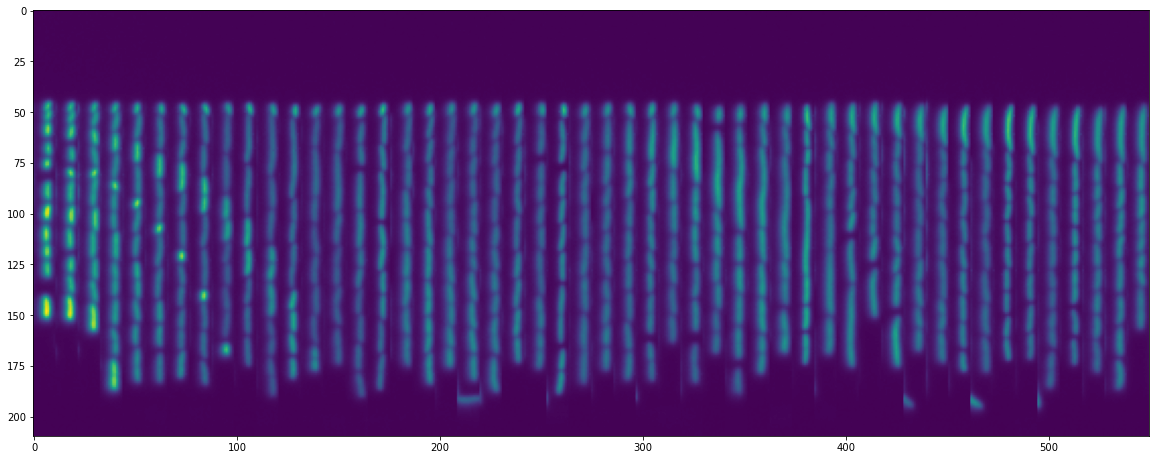

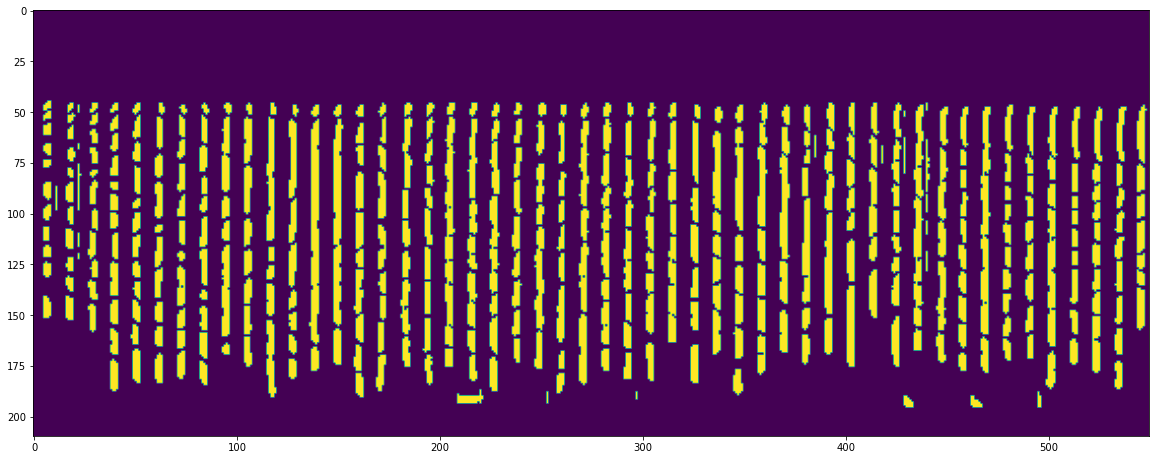

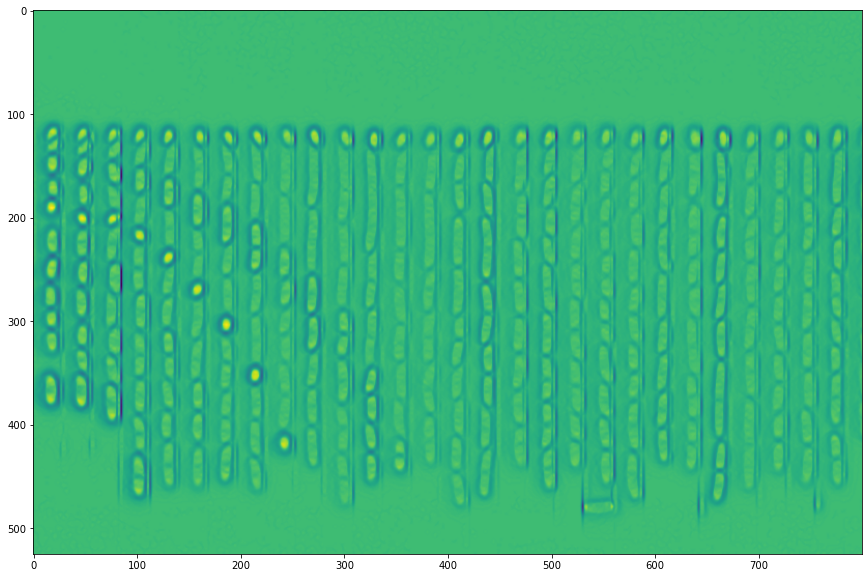

In [24]:
view.import_wrap(data)
print(view.return_unwrap().shape)

plt.imshow(view.return_unwrap()[:,:800])
plt.show()

view.import_wrap(output)
plt.imshow(view.return_unwrap()[:,:800])
plt.show()

plt.imshow(eig[:,:800])
plt.show()

In [25]:
view.import_wrap(data)
temp = view.return_unwrap()[:,:800]

In [26]:
data.shape

(50, 210, 11)

In [27]:
import skimage as sk
import numpy as np
edge_padding=6
img_arr = sk.util.invert(eig[:,:800])
# img_arr = data[0]
img_arr = np.pad(img_arr, edge_padding, 'reflect')
hessian = sk.feature.hessian_matrix(img_arr,order="rc")
eigvals = sk.feature.hessian_matrix_eigvals(hessian)
min_eigvals = np.min(eigvals,axis=0)
min_eigvals = min_eigvals[edge_padding:-edge_padding,edge_padding:-edge_padding]
max_val,min_val = np.max(min_eigvals),np.min(min_eigvals)
min_eigvals = (min_eigvals-min_val)/(max_val-min_val)
min_eigvals= segment.to_8bit(min_eigvals)
otsu_selem = sk.morphology.disk(20)
thr = sk.filters.rank.otsu(min_eigvals,otsu_selem)

In [28]:
min_eigvals

array([[213, 213, 212, ..., 215, 214, 213],
       [213, 213, 212, ..., 215, 214, 213],
       [214, 214, 213, ..., 214, 213, 213],
       ...,
       [213, 212, 214, ..., 213, 213, 213],
       [212, 213, 215, ..., 217, 214, 212],
       [212, 213, 215, ..., 218, 214, 212]], dtype=uint8)

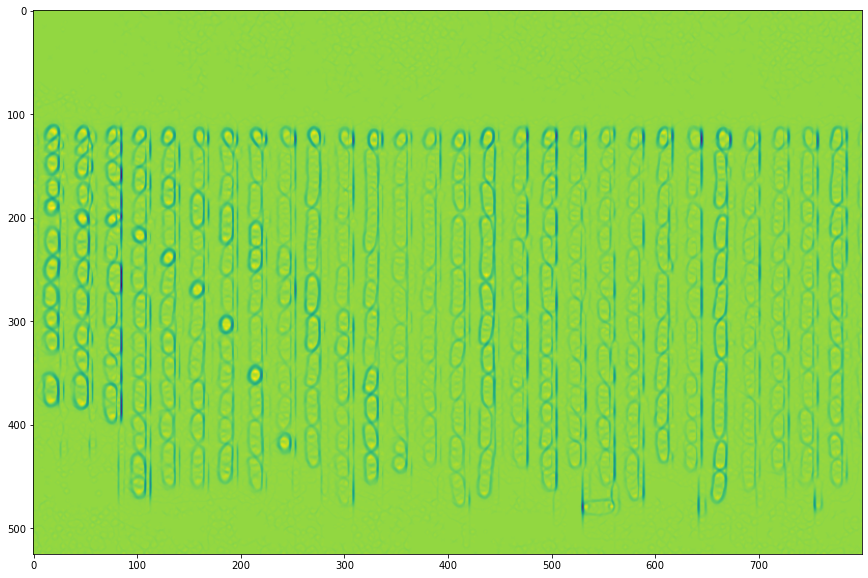

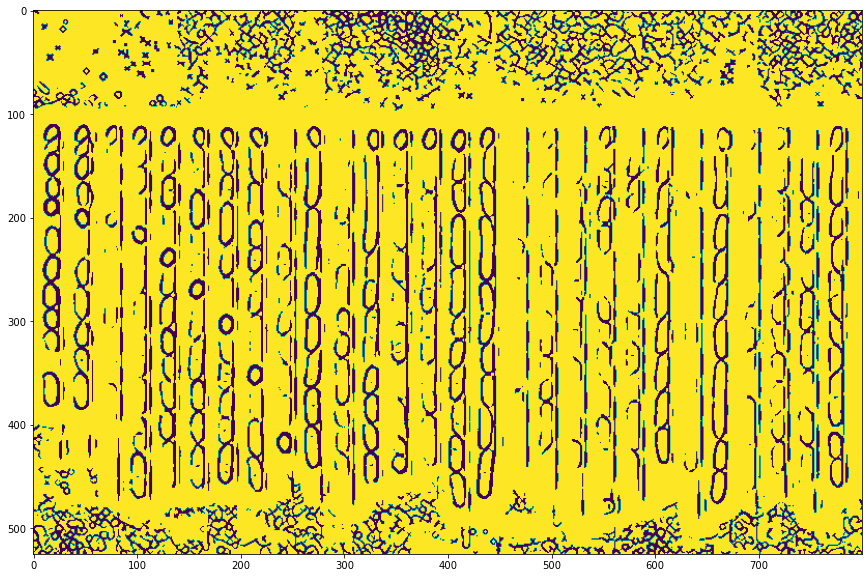

In [29]:
plt.imshow(min_eigvals)
plt.show()
plt.imshow(min_eigvals>thr)
plt.show()

In [115]:
view = tr.kymo_handle()
view.import_wrap(data[:20])
meme_img = view.return_unwrap()

In [116]:
view = tr.kymo_handle()
view.import_wrap(data[:20])
img = view.return_unwrap()
img = sk.transform.rescale(img,2.,anti_aliasing=False, preserve_range=True)
img = segment.to_8bit(img,20000)

In [31]:
test

NameError: name 'test' is not defined

In [32]:
mask.shape

NameError: name 'mask' is not defined

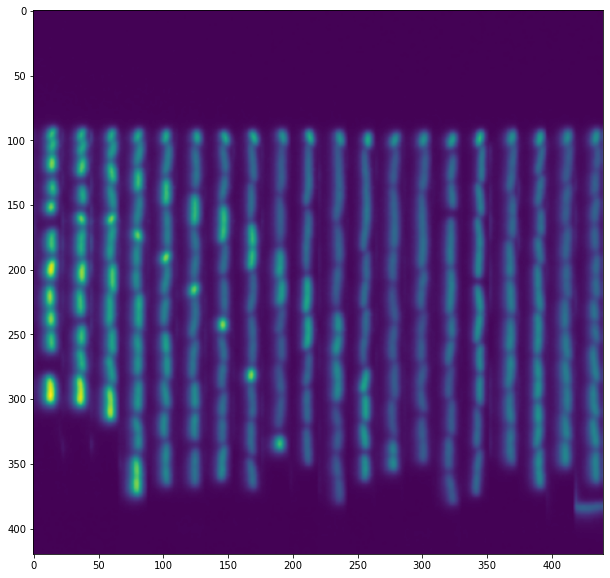

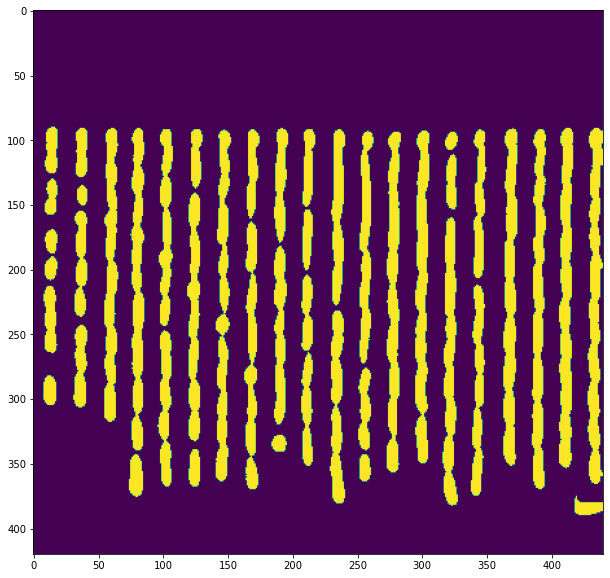

In [122]:
plt.imshow(img)
plt.show()
otsu_selem = sk.morphology.disk(19)
thr = sk.filters.rank.otsu(img,otsu_selem)
mask = (img>thr)*(img>25)
plt.imshow(mask)
plt.show()

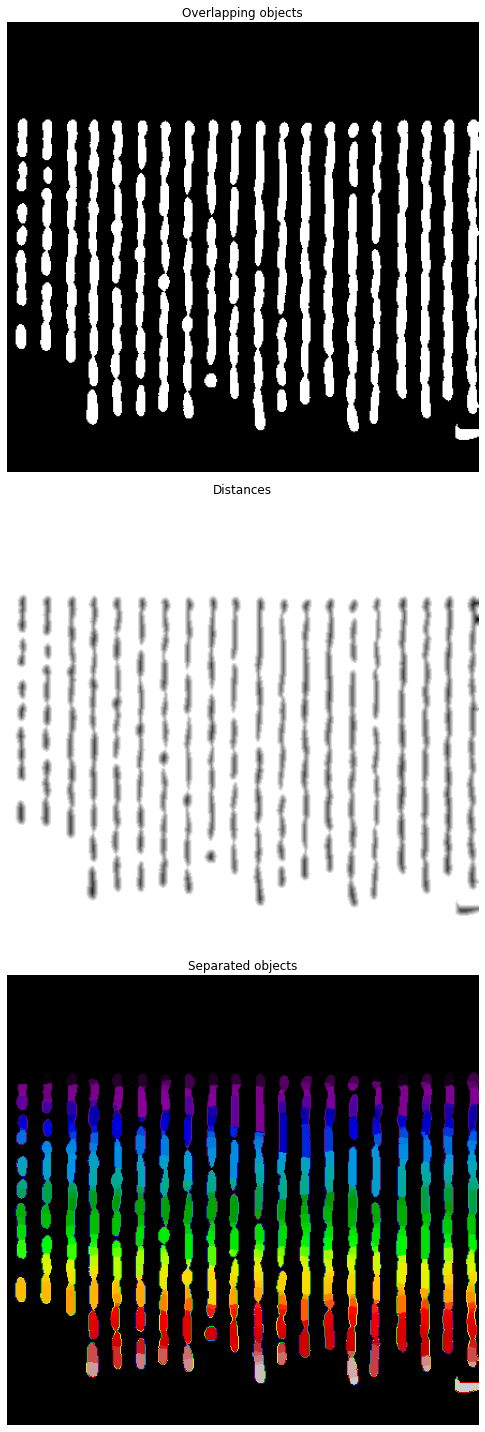

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max 

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
# inmask = sk.morphology.binary_erosion(mask[:,:500])
distance = ndi.distance_transform_edt(mask[:,:500])
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)))
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=mask[:,:500])

fig, axes = plt.subplots(nrows=3, figsize=(20, 20), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(mask[:,:500], cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

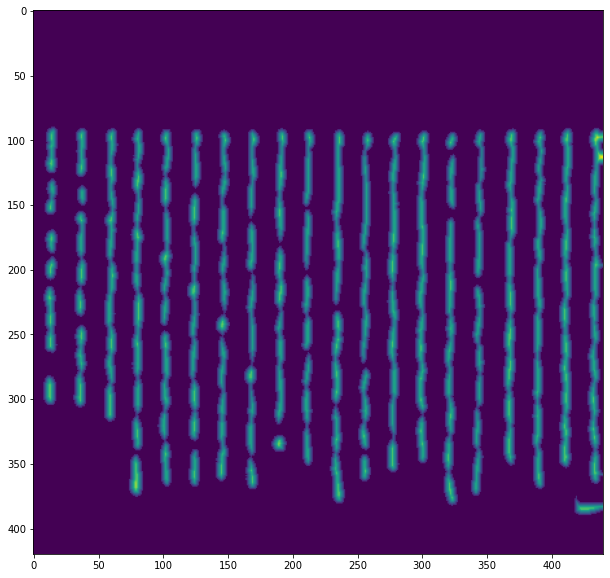

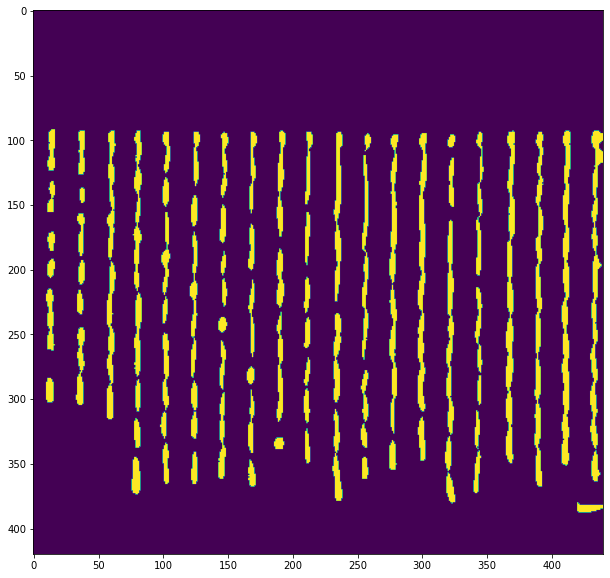

In [124]:
distance = ndi.distance_transform_edt(mask)
distance_mask = distance>2
plt.imshow(distance)
plt.show()
plt.imshow(distance_mask)
plt.show()

In [125]:
import skimage as sk
import numpy as np
edge_padding=6
img_arr = sk.util.invert(img)
# img_arr = data[0]
img_arr = np.pad(img_arr, edge_padding, 'reflect')
hessian = sk.feature.hessian_matrix(img_arr,order="rc")
eigvals = sk.feature.hessian_matrix_eigvals(hessian)
min_eigvals = np.min(eigvals,axis=0)
min_eigvals = min_eigvals[edge_padding:-edge_padding,edge_padding:-edge_padding]
max_val,min_val = np.max(min_eigvals),np.min(min_eigvals)
min_eigvals = (min_eigvals-min_val)/(max_val-min_val)
min_eigvals= segment.to_8bit(min_eigvals)
otsu_eig = sk.filters.threshold_niblack(min_eigvals)*1.
eig_mask = min_eigvals>otsu_eig
obj_mask = sk.measure.label(eig_mask*distance_mask)

labels = watershed(-distance, obj_mask, mask=mask,)

In [126]:
mask.dtype

dtype('bool')

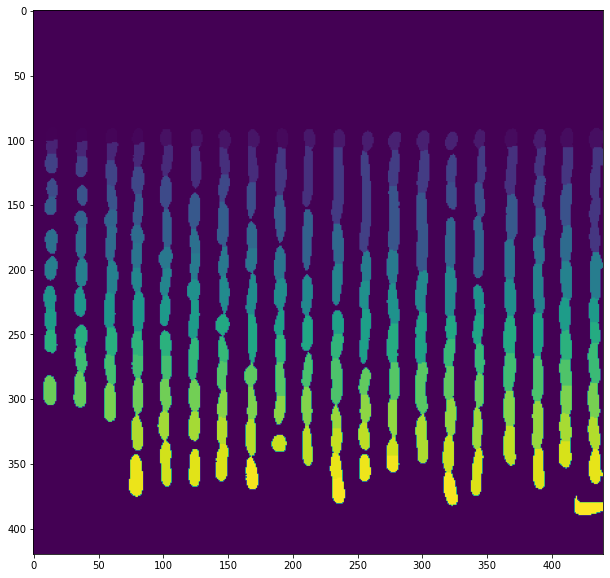

In [127]:
plt.imshow(labels)

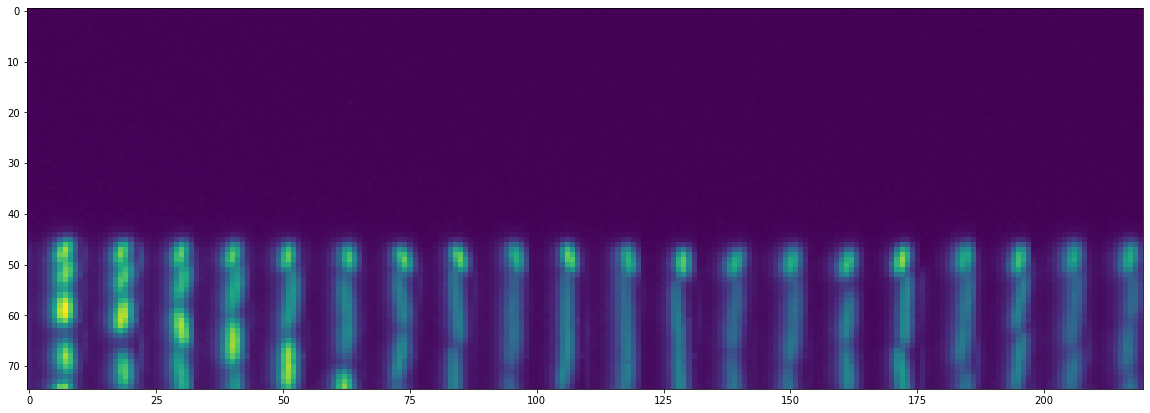

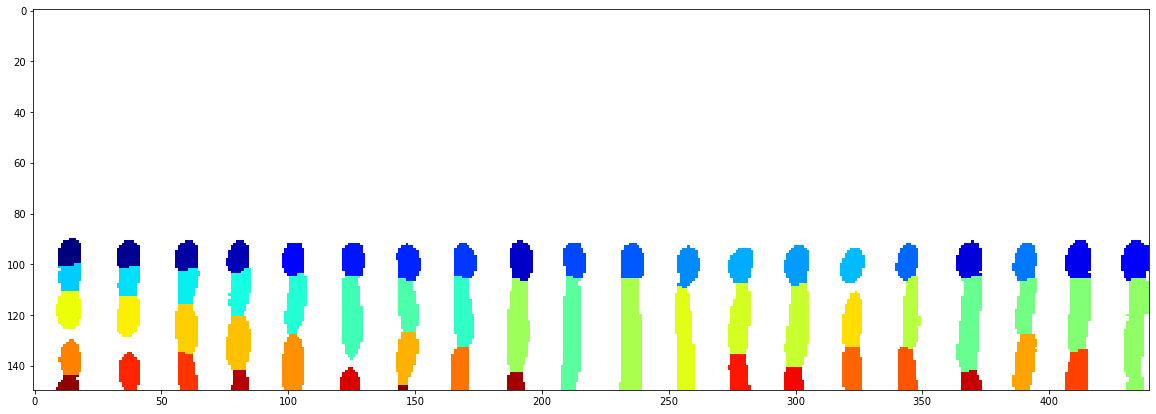

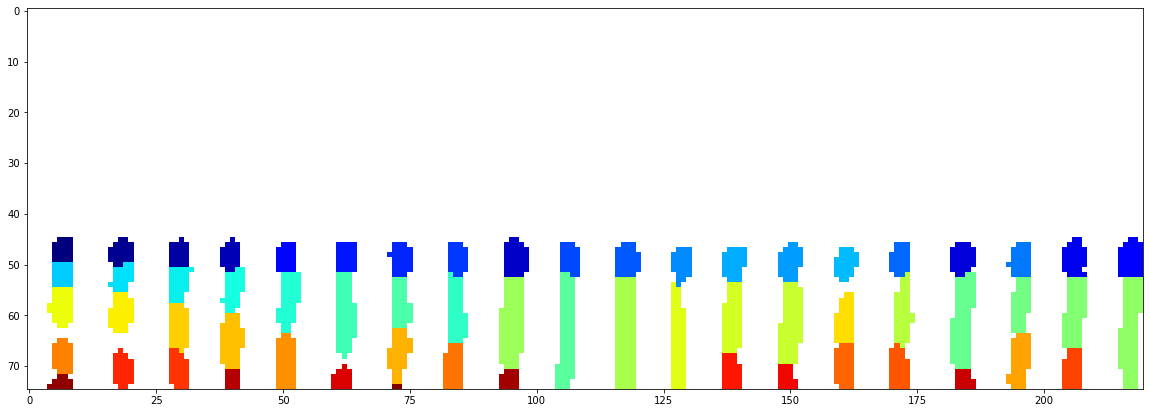

In [130]:
# plt.imshow(min_eigvals)
# plt.show()

# plt.imshow(eig_mask,interpolation='nearest')
# plt.show()

# plt.imshow(obj_mask,interpolation='nearest')
# plt.show()

# plt.imshow(obj_mask>0,interpolation='nearest')
# plt.show()

plt_mask = (labels == 0)
# plt.imshow(plt_mask,interpolation='nearest')
# plt.show()

plt.imshow(meme_img[0:75])
plt.show()

plt_img = np.ma.array(labels, mask=plt_mask)
plt.imshow(plt_img[0:150],cmap="jet",interpolation='nearest')
plt.show()

scaled_labels = sk.transform.rescale(labels,1./2.,order=0,anti_aliasing=False, preserve_range=True).astype("uint16")
plt_mask = (scaled_labels == 0)
plt_img = np.ma.array(scaled_labels, mask=plt_mask)
plt.imshow(plt_img[0:75],cmap="jet",interpolation='none')
plt.show()

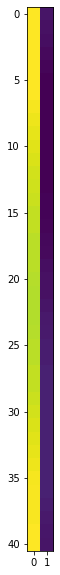

In [202]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure

# Find contours at a constant value of 0.8
contours = measure.find_contours(img, 0.8)
plt.imshow(contours[0]/2)

In [200]:
contours[0]/2

array([[50.1,  7.5],
       [50.1,  7. ],
       [50.1,  6.5],
       [50.1,  6. ],
       [50.1,  5.5],
       [50.1,  5. ],
       [50. ,  4.9],
       [49.5,  4.9],
       [49. ,  4.9],
       [48.5,  4.9],
       [48. ,  4.9],
       [47.5,  4.9],
       [47. ,  4.9],
       [46.9,  5. ],
       [46.5,  5.4],
       [46. ,  5.4],
       [45.9,  5.5],
       [45.5,  5.9],
       [45.4,  6. ],
       [45.4,  6.5],
       [45. ,  6.9],
       [44.9,  7. ],
       [44.9,  7.5],
       [44.9,  8. ],
       [45. ,  8.1],
       [45.4,  8.5],
       [45.5,  8.6],
       [45.9,  9. ],
       [46. ,  9.1],
       [46.5,  9.1],
       [47. ,  9.1],
       [47.5,  9.1],
       [48. ,  9.1],
       [48.5,  9.1],
       [49. ,  9.1],
       [49.5,  9.1],
       [49.6,  9. ],
       [49.6,  8.5],
       [49.6,  8. ],
       [50. ,  7.6],
       [50.1,  7.5]])

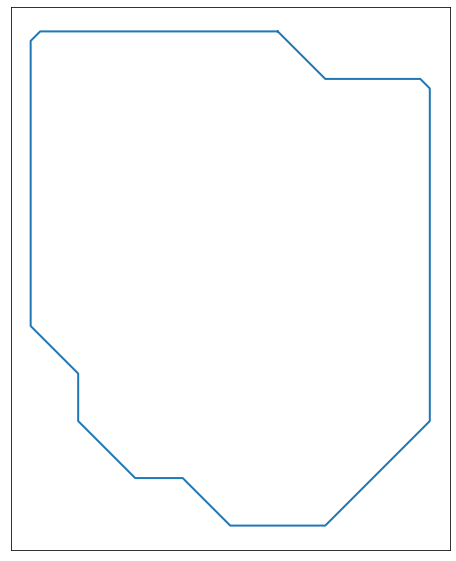

In [207]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure

# Find contours at a constant value of 0.8
contours = measure.find_contours(img, 0.8)
ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
plt.show()

import numpy as np
import matplotlib.pyplot as plt

from skimage import measure

# Find contours at a constant value of 0.8
contours = measure.find_contours(img, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
# ax.imshow(img, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

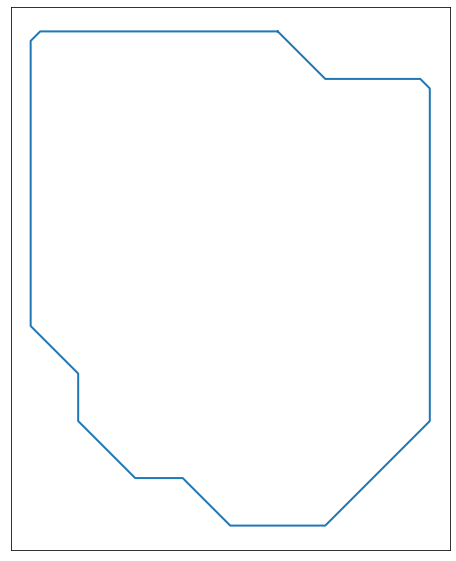

In [216]:
# Display the image and plot all contours found
fig, ax = plt.subplots()
# ax.imshow(img, cmap=plt.cm.gray)
scaled_contours = [item/2 for item in contours]

for n, contour in enumerate(scaled_contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [218]:
scaled_contours

[array([[50.1,  7.5],
        [50.1,  7. ],
        [50.1,  6.5],
        [50.1,  6. ],
        [50.1,  5.5],
        [50.1,  5. ],
        [50. ,  4.9],
        [49.5,  4.9],
        [49. ,  4.9],
        [48.5,  4.9],
        [48. ,  4.9],
        [47.5,  4.9],
        [47. ,  4.9],
        [46.9,  5. ],
        [46.5,  5.4],
        [46. ,  5.4],
        [45.9,  5.5],
        [45.5,  5.9],
        [45.4,  6. ],
        [45.4,  6.5],
        [45. ,  6.9],
        [44.9,  7. ],
        [44.9,  7.5],
        [44.9,  8. ],
        [45. ,  8.1],
        [45.4,  8.5],
        [45.5,  8.6],
        [45.9,  9. ],
        [46. ,  9.1],
        [46.5,  9.1],
        [47. ,  9.1],
        [47.5,  9.1],
        [48. ,  9.1],
        [48.5,  9.1],
        [49. ,  9.1],
        [49.5,  9.1],
        [49.6,  9. ],
        [49.6,  8.5],
        [49.6,  8. ],
        [50. ,  7.6],
        [50.1,  7.5]])]

In [223]:
np.round(contour[:, 0]).astype('int')

array([50, 50, 50, 50, 50, 50, 50, 50, 49, 48, 48, 48, 47, 47, 46, 46, 46,
       46, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 47, 48, 48, 48,
       49, 50, 50, 50, 50, 50, 50])

In [224]:
np.round(contour[:, 1]).astype('int')

array([8, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7,
       8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8])

In [226]:
img.shape

(420, 440)

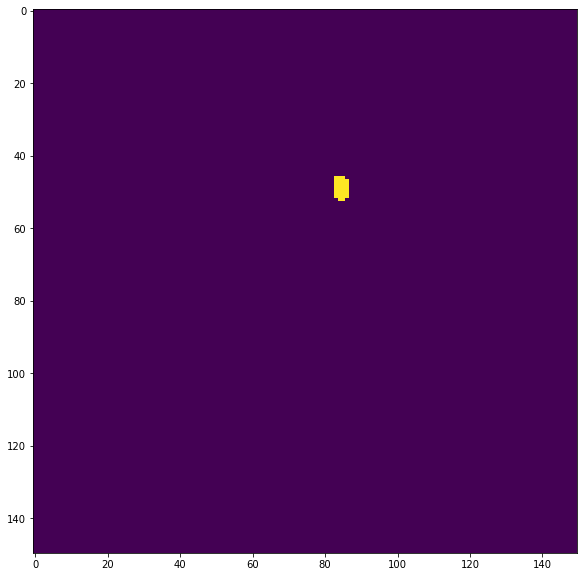

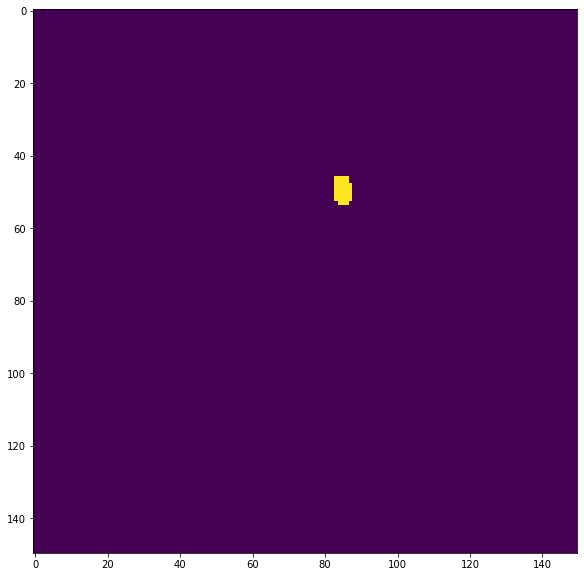

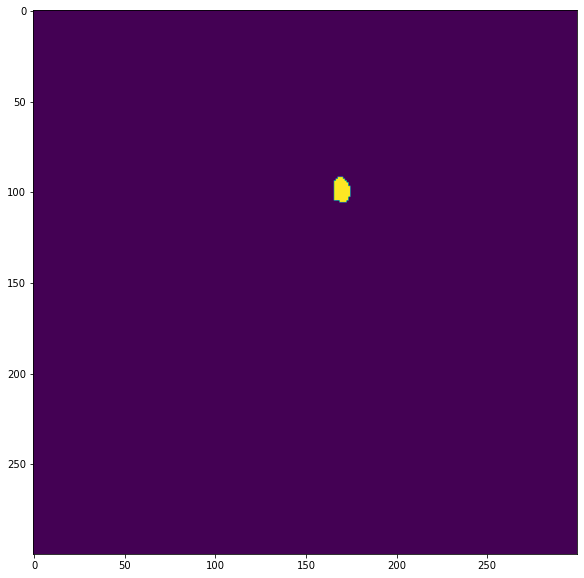

In [250]:
# Create an empty image to store the masked array
idx = 12
img=(labels==idx)

contours = measure.find_contours(img, 0.8)
scaled_contours = [item/2 for item in contours]

contour = scaled_contours[0]
r_mask = np.zeros(scaled_labels.shape, dtype='bool')

# Create a contour image by using the contour coordinates rounded to their nearest integer value
r_mask[np.round(contour[:, 0]).astype('int'), np.round(contour[:, 1]).astype('int')] = 1

# # Fill in the hole created by the contour boundary
r_mask = sk.morphology.remove_small_holes(r_mask)

# # Invert the mask since you want pixels outside of the region
# r_mask = ~r_mask

scaled_labels = sk.transform.rescale(labels,1./2.,order=0,anti_aliasing=False, preserve_range=True).astype("uint16")
testmask = scaled_labels==idx
plt.imshow(testmask[:150,:150])
plt.show()

plt.imshow(r_mask[:150,:150])
plt.show()

plt.imshow(img[:300,:300])
plt.show()

In [217]:
scaled_contours

[array([[50.1,  7.5],
        [50.1,  7. ],
        [50.1,  6.5],
        [50.1,  6. ],
        [50.1,  5.5],
        [50.1,  5. ],
        [50. ,  4.9],
        [49.5,  4.9],
        [49. ,  4.9],
        [48.5,  4.9],
        [48. ,  4.9],
        [47.5,  4.9],
        [47. ,  4.9],
        [46.9,  5. ],
        [46.5,  5.4],
        [46. ,  5.4],
        [45.9,  5.5],
        [45.5,  5.9],
        [45.4,  6. ],
        [45.4,  6.5],
        [45. ,  6.9],
        [44.9,  7. ],
        [44.9,  7.5],
        [44.9,  8. ],
        [45. ,  8.1],
        [45.4,  8.5],
        [45.5,  8.6],
        [45.9,  9. ],
        [46. ,  9.1],
        [46.5,  9.1],
        [47. ,  9.1],
        [47.5,  9.1],
        [48. ,  9.1],
        [48.5,  9.1],
        [49. ,  9.1],
        [49.5,  9.1],
        [49.6,  9. ],
        [49.6,  8.5],
        [49.6,  8. ],
        [50. ,  7.6],
        [50.1,  7.5]])]

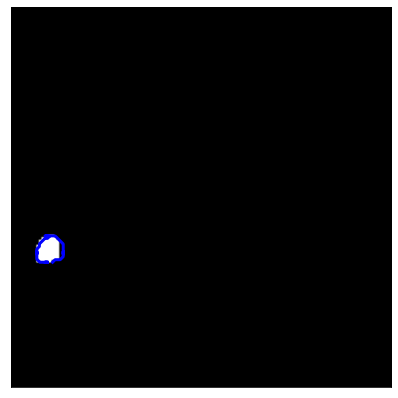

In [195]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

rps = sk.measure.regionprops(labels)
bboxes = [rp.bbox for rp in rps]
bboxes[0]

s = np.linspace(0, 2*np.pi, 400)
r = int((bboxes[0][0]+bboxes[0][2])/2) + 100*np.sin(s)
c = int((bboxes[0][1]+bboxes[0][3])/2) + 100*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(img,
                       contours[0], alpha=0.0001, beta=10, gamma=0.0001,
                       coordinates='rc')

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img[:150,:150], cmap=plt.cm.gray)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])

plt.show()

In [93]:
plt.imshow()

TypeError: imshow() missing 1 required positional argument: 'X'

In [ ]:
plt.imshow(scaled_labels,cmap="jet",interpolation='nearest')

In [534]:
segment.dask_segment(dask_controller)

NameError: name 'dask_controller' is not defined

In [ ]:
dask_controller.daskclient.restart()

Future exception was never retrieved
future: <Future finished exception=CommClosedError("in <closed TCP>: Stream is closed: while trying to call remote method 'restart'")>
Traceback (most recent call last):
  File "/home/de64/miniconda3/envs/trenchripper/lib/python3.7/site-packages/distributed/comm/tcp.py", line 188, in read
    n_frames = await stream.read_bytes(8)
tornado.iostream.StreamClosedError: Stream is closed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/de64/miniconda3/envs/trenchripper/lib/python3.7/site-packages/distributed/core.py", line 686, in send_recv_from_rpc
    result = await send_recv(comm=comm, op=key, **kwargs)
  File "/home/de64/miniconda3/envs/trenchripper/lib/python3.7/site-packages/distributed/core.py", line 540, in send_recv
    response = await comm.read(deserializers=deserializers)
  File "/home/de64/miniconda3/envs/trenchripper/lib/python3.7/site-packages/distributed/comm/tcp.py", li

#### Stop Dask Workers

In [11]:
dask_controller.shutdown()

Future exception was never retrieved
future: <Future finished exception=CommClosedError("in <closed TCP>: Stream is closed: while trying to call remote method 'restart'")>
Traceback (most recent call last):
  File "/home/de64/miniconda3/envs/trenchripper/lib/python3.7/site-packages/distributed/comm/tcp.py", line 188, in read
    n_frames = await stream.read_bytes(8)
tornado.iostream.StreamClosedError: Stream is closed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/de64/miniconda3/envs/trenchripper/lib/python3.7/site-packages/distributed/core.py", line 686, in send_recv_from_rpc
    result = await send_recv(comm=comm, op=key, **kwargs)
  File "/home/de64/miniconda3/envs/trenchripper/lib/python3.7/site-packages/distributed/core.py", line 540, in send_recv
    response = await comm.read(deserializers=deserializers)
  File "/home/de64/miniconda3/envs/trenchripper/lib/python3.7/site-packages/distributed/comm/tcp.py", li

KeyboardInterrupt: 

In [ ]:
edge_padding=6
img_arr = sk.util.invert(img)
# img_arr = data[0]
img_arr = np.pad(img_arr, edge_padding, 'reflect')
hessian = sk.feature.hessian_matrix(img_arr,order="rc")
eigvals = sk.feature.hessian_matrix_eigvals(hessian)
min_eigvals = np.min(eigvals,axis=0)
min_eigvals = min_eigvals[edge_padding:-edge_padding,edge_padding:-edge_padding]
max_val,min_val = np.max(min_eigvals),np.min(min_eigvals)
min_eigvals = (min_eigvals-min_val)/(max_val-min_val)

min_eigvals= segment.to_8bit(min_eigvals)
otsu_eig = sk.filters.threshold_niblack(min_eigvals)*1.
eig_mask = min_eigvals>otsu_eig
obj_mask = sk.measure.label(eig_mask*distance_mask)

labels = watershed(-distance, obj_mask, mask=mask,)

In [ ]:
distance = ndi.distance_transform_edt(mask)
distance_mask = distance>2
plt.imshow(distance)
plt.show()
plt.imshow(distance_mask)
plt.show()

In [596]:
from paulssonlab.deaton.trenchripper.trenchripper import kymo_handle
output_kymo = kymo_handle()

In [ ]:
output_kymo.import_unwrap()

In [4]:
import skimage.transform as transform
import skimage as sk
from paulssonlab.deaton.trenchripper.trenchripper import kymo_handle,pandas_hdf5_handler,writedir

In [5]:
class fluo_segmentation:
    def __init__(self,bit_max=0,scale_timepoints=False,scaling_percentage=0.9,img_scaling=1.,smooth_sigma=0.75,niblack_scaling=1.,\
                 hess_pad=6,global_threshold=25,cell_otsu_scaling=1.,local_otsu_r=15,min_obj_size=30,distance_threshold=2):
        self.bit_max = bit_max
        
        self.scale_timepoints=scale_timepoints
        self.scaling_percentage=scaling_percentage
        
        self.img_scaling = img_scaling

        self.smooth_sigma = smooth_sigma
        
        self.niblack_scaling = niblack_scaling
        self.hess_pad = hess_pad
        
        self.global_threshold = global_threshold
        self.cell_otsu_scaling = cell_otsu_scaling
        self.local_otsu_r = local_otsu_r
        self.min_obj_size = min_obj_size
        
        self.distance_threshold = distance_threshold
        
    def to_8bit(self,img_arr,bit_max=None):
        img_max = np.max(img_arr)+0.0001
        if bit_max is None:
            max_val = img_max
        else:
            max_val = max(img_max,bit_max)
        min_val = np.min(img_arr)
#         min_val = np.min(img_arr)
        norm_array = (img_arr-min_val)/(max_val-min_val)
        norm_byte_array = sk.img_as_ubyte(norm_array)
        return norm_byte_array
    
    def scale_kymo(self,wrap_arr,percentile):
        perc_t = np.percentile(wrap_arr[:].reshape(wrap_arr.shape[0],-1),percentile,axis=1)
        norm_perc_t = perc_t/np.max(perc_t)
        scaled_arr = wrap_arr.astype(float)/norm_perc_t[:,np.newaxis,np.newaxis]
        scaled_arr[scaled_arr>255.] = 255.
        scaled_arr = scaled_arr.astype("uint8")
        return scaled_arr
    
    def get_eig_img(self,img_arr,edge_padding=6):
        inverted = sk.util.invert(img_arr)
        del img_arr
        inverted = np.pad(inverted, edge_padding, 'reflect')
        hessian = sk.feature.hessian_matrix(inverted,order="rc")
        del inverted
        eig_img = sk.feature.hessian_matrix_eigvals(hessian)
        del hessian
        eig_img = np.min(eig_img,axis=0)
        eig_img = eig_img[edge_padding:-edge_padding,edge_padding:-edge_padding]
        max_val,min_val = np.max(eig_img),np.min(eig_img)
        eig_img = self.to_8bit(eig_img)
        return eig_img
    
    def get_eig_mask(self,eig_img,niblack_scaling=1.):
        eig_thr = sk.filters.threshold_niblack(eig_img)*niblack_scaling
        eig_mask = eig_img>eig_thr
        return eig_mask
    
    def get_cell_mask(self,img_arr,global_threshold=50,cell_otsu_scaling=1.,local_otsu_r=15,min_obj_size=30):
        otsu_selem = sk.morphology.disk(local_otsu_r)
        thr = sk.filters.rank.otsu(img_arr,otsu_selem)
        del otsu_selem
        cell_mask = (img_arr>thr)*(img_arr>global_threshold)
        del img_arr
        cell_mask = sk.morphology.remove_small_objects(cell_mask,min_size=min_obj_size)
        cell_mask = sk.morphology.remove_small_holes(cell_mask)
        
        return cell_mask
        
    def segment(self,img_arr): #img_arr is t,y,x
        t_tot = img_arr.shape[0]
        img_arr = self.to_8bit(img_arr,self.bit_max)
        if self.scale_timepoints:
            img_arr = self.scale_kymo(img_arr,self.scaling_percentage)
        
        input_kymo = kymo_handle()
        input_kymo.import_wrap(img_arr)
        del img_arr
        
        input_kymo = input_kymo.return_unwrap()
        original_shape = input_kymo.shape 
        input_kymo = transform.rescale(input_kymo,self.img_scaling,anti_aliasing=False, preserve_range=True).astype("uint8")
        input_kymo = sk.filters.gaussian(input_kymo,sigma=self.smooth_sigma,preserve_range=True,mode='reflect').astype("uint8")
        
        eig_img = self.get_eig_img(input_kymo,edge_padding=self.hess_pad)
        eig_mask = self.get_eig_mask(eig_img,niblack_scaling=self.niblack_scaling)
        del eig_img
        
        cell_mask = self.get_cell_mask(input_kymo,global_threshold=self.global_threshold,\
                    cell_otsu_scaling=self.cell_otsu_scaling,local_otsu_r=self.local_otsu_r,\
                    min_obj_size=self.min_obj_size)
        del input_kymo
        
        dist_img = ndi.distance_transform_edt(cell_mask).astype("uint8")
        dist_mask = dist_img>self.distance_threshold
        marker_mask = dist_mask*eig_mask
        del dist_mask
        marker_mask = sk.measure.label(marker_mask)
        
        output_labels = watershed(-dist_img, markers=marker_mask, mask=cell_mask)

        del dist_img
        del marker_mask
        del cell_mask
        output_labels = sk.transform.resize(output_labels,original_shape,order=0,anti_aliasing=False, preserve_range=True).astype("uint32")
         
        output_kymo = kymo_handle()
        output_kymo.import_unwrap(output_labels,t_tot)
        del output_labels
        output_kymo = output_kymo.return_wrap()
        return output_kymo
    
class fluo_segmentation_cluster(fluo_segmentation):
    def __init__(self,headpath,paramfile=True,seg_channel="",bit_max=0,scale_timepoints=False,scaling_percentage=0.9,\
                 img_scaling=1.,smooth_sigma=0.75,niblack_scaling=1.,hess_pad=6,global_threshold=25,cell_otsu_scaling=1.,\
                 local_otsu_r=15,min_obj_size=30,distance_threshold=2):

#         if paramfile:
#             parampath = headpath + "/fluorescent_segmentation.par"
#             with open(parampath, 'rb') as infile:
#                 param_dict = pickle.load(infile)
                
#             img_scaling = param_dict["Image Scaling Factor:"]
#             scale_timepoints = param_dict["Scale Fluorescence?"]
#             scaling_percentage = param_dict["Scaling Percentile:"]
#             seg_channel = param_dict["Segmentation Channel:"]
#             smooth_sigma = param_dict["Gaussian Kernel Sigma:"]
#             bit_max = param_dict['8 Bit Maximum:']
#             min_obj_size = param_dict["Minimum Object Size:"]
#             cell_mask_method = param_dict["Cell Mask Thresholding Method:"]
#             global_threshold = param_dict["Global Threshold:"]
#             cell_otsu_scaling = param_dict["Cell Threshold Scaling:"]
#             local_otsu_r = param_dict["Local Otsu Radius:"]
#             edge_threshold_scaling = param_dict["Edge Threshold Scaling:"]
#             threshold_step_perc = param_dict["Threshold Step Percent:"]
#             threshold_perc_num_steps = param_dict["Number of Threshold Steps:"]
#             convex_threshold = param_dict["Convexity Threshold:"]

        super(fluo_segmentation_cluster, self).__init__(bit_max=bit_max,scale_timepoints=scale_timepoints,scaling_percentage=scaling_percentage,\
                                                        img_scaling=img_scaling,smooth_sigma=smooth_sigma,niblack_scaling=niblack_scaling,\
                                                        hess_pad=hess_pad,global_threshold=global_threshold,cell_otsu_scaling=cell_otsu_scaling,\
                                                        local_otsu_r=local_otsu_r,min_obj_size=min_obj_size,distance_threshold=distance_threshold)

        self.headpath = headpath
        self.seg_channel = seg_channel
        self.kymographpath = headpath + "/kymograph"
        self.fluorsegmentationpath = headpath + "/fluorsegmentation"
        self.metapath = headpath + "/metadata.hdf5"
        self.meta_handle = pandas_hdf5_handler(self.metapath)

    def generate_segmentation(self,file_idx):
        with h5py.File(self.kymographpath + "/kymograph_" + str(file_idx) + ".hdf5","r") as input_file:
            input_data = input_file[self.seg_channel]
            trench_output = []
            for trench_idx in range(input_data.shape[0]):
                trench_array = input_data[trench_idx]
                trench_array = self.segment(trench_array)
                trench_output.append(trench_array[np.newaxis])
                del trench_array
        trench_output = np.concatenate(trench_output,axis=0)
        with h5py.File(self.fluorsegmentationpath + "/segmentation_" + str(file_idx) + ".hdf5", "w") as h5pyfile:
            hdf5_dataset = h5pyfile.create_dataset("data", data=trench_output, dtype="uint16")
        return file_idx
    
    def segmentation_completed(self,seg_future):
        return 0

    def dask_segment(self,dask_controller):
        writedir(self.fluorsegmentationpath,overwrite=True)
        dask_controller.futures = {}

        kymodf = self.meta_handle.read_df("kymograph",read_metadata=True)
        file_list = kymodf["File Index"].unique().tolist()
        num_file_jobs = len(file_list)

        random_priorities = np.random.uniform(size=(num_file_jobs,))
        for k,file_idx in enumerate(file_list):
            priority = random_priorities[k]

            future = dask_controller.daskclient.submit(self.generate_segmentation,file_idx,retries=0,priority=priority)
            dask_controller.futures["Segmentation: " + str(file_idx)] = future
        for k,file_idx in enumerate(file_list):
            priority = random_priorities[k]

            future = dask_controller.daskclient.submit(self.segmentation_completed,dask_controller.futures["Segmentation: " + str(file_idx)],retries=0,priority=priority)
            dask_controller.futures["Segmentation Completed: " + str(file_idx)] = future
        gathered_tasks = dask_controller.daskclient.gather([dask_controller.futures["Segmentation Completed: " + str(file_idx)] for file_idx in file_list],errors="skip")
        


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
import h5py
import pickle
import copy

from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider, Dropdown, IntText, SelectMultiple, Select, IntRangeSlider, FloatRangeSlider
from skimage import filters,transform
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection

class fluo_segmentation_interactive(fluo_segmentation):

    def __init__(self,headpath,bit_max=0,scale_timepoints=False,scaling_percentage=0.9,img_scaling=1.,smooth_sigma=0.75,niblack_scaling=1.,\
                 hess_pad=6,global_threshold=25,cell_otsu_scaling=1.,local_otsu_r=15,min_obj_size=30,distance_threshold=2):

        fluo_segmentation.__init__(self,bit_max=bit_max,scale_timepoints=scale_timepoints,scaling_percentage=scaling_percentage,\
                                   img_scaling=img_scaling,smooth_sigma=smooth_sigma,niblack_scaling=niblack_scaling,\
                                  hess_pad=hess_pad,global_threshold=global_threshold,cell_otsu_scaling=cell_otsu_scaling,\
                                   local_otsu_r=local_otsu_r,min_obj_size=min_obj_size,distance_threshold=distance_threshold)

        self.headpath = headpath
        self.kymographpath = headpath + "/kymograph"
        self.metapath = headpath + "/metadata.hdf5"
        self.meta_handle = pandas_hdf5_handler(self.metapath)
        self.kymodf = self.meta_handle.read_df("kymograph",read_metadata=True)
        globaldf = self.meta_handle.read_df("global",read_metadata=True)
        self.all_channels = globaldf.metadata['channels']

        timepoint_num = len(self.kymodf.index.get_level_values("timepoints").unique().tolist())
        self.t_range = (0,timepoint_num)
        self.trenchid_arr = self.kymodf.index.get_level_values("trenchid").unique().values

        self.final_params = {}

    def choose_seg_channel(self,seg_channel):
        self.seg_channel = seg_channel

    def choose_seg_channel_inter(self):
        choose_channel = interactive(self.choose_seg_channel,{"manual": True},\
        seg_channel=Dropdown(options=self.all_channels,value=self.all_channels[0]))
        display(choose_channel)

    def plot_img_list(self,img_list):
        nrow = ((len(img_list)-1)//self.img_per_row)+1
        fig, axes = plt.subplots(nrows=nrow, ncols=self.img_per_row, figsize=self.fig_size)
        for i in range(len(img_list)):
            img = img_list[i]
            if nrow < 2:
                axes[i%self.img_per_row].imshow(img,cmap="Greys_r")
            else:
                axes[i//self.img_per_row,i%self.img_per_row].imshow(img,cmap="Greys_r")
        extra_slots = self.img_per_row - (len(img_list)%self.img_per_row)
        if extra_slots != 0:
            for slot in range(1,extra_slots+1):
                if nrow < 2:
                    axes[self.img_per_row-slot].axis('off')
                else:
                    axes[-1, self.img_per_row-slot].axis('off')
        plt.tight_layout()
        plt.show()

    def import_array(self,n_trenches,t_range=(0,None),t_subsample_step=1,fig_size_y=9,fig_size_x=6,img_per_row=2):
        self.fig_size = (fig_size_y,fig_size_x)
        self.img_per_row = img_per_row

        rand_trench_arr = np.random.choice(self.trenchid_arr,size=(n_trenches,),replace=False)
        self.selecteddf = self.kymodf.loc[list(zip(rand_trench_arr,np.zeros(len(rand_trench_arr)).astype(int)))]
        selectedlist = list(zip(self.selecteddf["File Index"].tolist(),self.selecteddf["File Trench Index"].tolist()))

        array_list = []
        for item in selectedlist:
            with h5py.File(self.kymographpath + "/kymograph_" + str(item[0]) + ".hdf5", "r") as hdf5_handle:
                if t_range[1] == None:
                    array = hdf5_handle[self.seg_channel][item[1],t_range[0]::t_subsample_step]
                else:
                    array = hdf5_handle[self.seg_channel][item[1],t_range[0]:t_range[1]+1:t_subsample_step]
            array_list.append(array)
        output_array = np.concatenate(np.expand_dims(array_list,axis=0),axis=0)
        self.t_tot = output_array.shape[1]
        self.plot_kymographs(output_array)
        self.output_array = output_array

        return output_array

    def import_array_inter(self):
        kymo_arr_int = interactive(self.import_array,{"manual": True},n_trenches=IntText(value=12,\
                       description="Number of trenches:", disabled=False),t_range=IntRangeSlider(value=[self.t_range[0],\
                       self.t_range[1] - 1],description="Time Range:",min=self.t_range[0],max=self.t_range[1] - 1,step=1,\
                       disabled=False),t_subsample_step=IntSlider(value=1, description="Time Subsampling Step:", min=1,\
                       max=20, step=1),fig_size_y=IntSlider(value=20, description="Figure Size (Y Dimension):", min=1,\
                       max=30, step=1),fig_size_x=IntSlider(value=12, description="Figure Size (X Dimension):", min=1,\
                       max=30, step=1),img_per_row=IntSlider(value=6, description="Images per Row:", min=1, max=30,\
                       step=1))
        display(kymo_arr_int)

    def plot_kymographs(self,kymo_arr):
        input_kymo = kymo_handle()
        img_list = []
        for k in range(kymo_arr.shape[0]):
            input_kymo.import_wrap(kymo_arr[k])
            img_list.append(input_kymo.return_unwrap())
        self.plot_img_list(img_list)
        return img_list

    def plot_processed(self,bit_max,scale_timepoints,scaling_percentile,img_scaling,smooth_sigma):
        
        self.final_params['8 Bit Maximum:'] = bit_max
        self.final_params['Scale Fluorescence?'] = scale_timepoints
        self.final_params["Scaling Percentile:"] = scaling_percentile
        self.final_params["Image Scaling Factor:"] = img_scaling
        self.final_params['Gaussian Kernel Sigma:'] = smooth_sigma
        
        output_array = copy.copy(self.output_array) #k,t,y,x
        
        percentile = int(np.percentile(output_array.flatten(), 99))
        print("99th percentile:" + str(percentile))
        fig, ax = plt.subplots(1, 1)
        ax.hist(output_array.flatten(),bins=50)
        ax.axvline(bit_max,c="r",linewidth=3,zorder=10)
        ax.set_title("Pixel Value Histogram w/ 8-bit Maximum",fontsize=20)
        ax.set_xlabel("Pixel Value",fontsize=15)
        fig.set_size_inches(9, 6)
        fig.show()
        
        output_array_list = []
        for k in range(output_array.shape[0]):
            scaled_output_array = self.to_8bit(output_array[k],bit_max)
            if scale_timepoints:
                scaled_output_array = self.scale_kymo(scaled_output_array,scaling_percentile)
            output_array_list.append(scaled_output_array)
        output_array = np.array(output_array_list)

#         proc_list = []
        unwrap_proc_list = []
        for k in range(output_array.shape[0]):
            t_tot = output_array[k].shape[0]
            output_array_unwrapped = kymo_handle()
            output_array_unwrapped.import_wrap(output_array[k])
            output_array_unwrapped = output_array_unwrapped.return_unwrap()
            rescaled_unwrapped = transform.rescale(output_array_unwrapped,img_scaling,anti_aliasing=False, preserve_range=True).astype("uint8")
            filtered_unwrapped = sk.filters.gaussian(rescaled_unwrapped,sigma=smooth_sigma,preserve_range=True,mode='reflect').astype("uint8")
#             filtered_wrapped = kymo_handle()
#             filtered_wrapped.import_unwrap(filtered_unwrapped,t_tot)
#             filtered_wrapped = filtered_wrapped.return_wrap()
#             proc_list.append(filtered_wrapped)
            unwrap_proc_list.append(filtered_unwrapped)
        self.proc_list = unwrap_proc_list
        del unwrap_proc_list
        self.eig_list = [self.get_eig_img(item,edge_padding=self.hess_pad) for item in self.proc_list]
        
        self.plot_img_list(self.proc_list)
        self.plot_img_list(self.eig_list)

    def plot_processed_inter(self):
        proc_list_int = interactive(
            self.plot_processed,
            {"manual": True},
            bit_max=IntSlider(
                value=1000,
                description="8-bit Maximum:",
                min=0,
                max=65535,
                step=250,
                disabled=False,
            ),
            scale_timepoints=Dropdown(
                options=[True, False],
                value=False,
                description="Scale Fluorescence?",
                disabled=False,
            ),
            scaling_percentile=IntSlider(
                value=90,
                description="Scaling Percentile:",
                min=0,
                max=100,
                step=1,
                disabled=False,
            ),
            img_scaling=FloatSlider(
                value=1.,
                description="Image Upsampling Factor:",
                min=1.,
                max=3.,
                step=0.25,
                disabled=False,
            ),
            smooth_sigma=FloatSlider(
                value=0.75,
                description="Gaussian Kernel Sigma:",
                min=0.0,
                max=3.0,
                step=0.25,
                disabled=False,
            ),
        )

        display(proc_list_int)

#     def plot_cell_mask(self,global_threshold,cell_mask_method,cell_otsu_scaling,local_otsu_r):
#         self.final_params['Cell Mask Thresholding Method:'] = cell_mask_method
#         self.final_params['Global Threshold:'] = global_threshold
#         self.final_params['Cell Threshold Scaling:'] = cell_otsu_scaling
#         self.final_params['Local Otsu Radius:'] = local_otsu_r

#         cell_mask_list = []
#         unwrap_cell_mask_list = []

#         for proc in self.proc_list:
#             cell_mask = self.cell_region_mask(proc,method=cell_mask_method,global_threshold=global_threshold,cell_otsu_scaling=cell_otsu_scaling,local_otsu_r=local_otsu_r)
#             cell_mask_list.append(cell_mask)

#             cell_mask_kymo = kymo_handle()
#             cell_mask_kymo.import_wrap(cell_mask)
#             unwrap_cell_mask = cell_mask_kymo.return_unwrap(padding=0)

#             unwrap_cell_mask_list.append(unwrap_cell_mask)
#         self.plot_img_list(unwrap_cell_mask_list)

#         plt.hist(np.array(self.proc_list).flatten(),bins=50)
#         plt.show()

#         self.cell_mask_list = cell_mask_list

#     def plot_cell_mask_inter(self):
#         cell_mask_list_int = interactive(
#             self.plot_cell_mask,
#             {"manual": True},
#             cell_mask_method=Dropdown(
#                 options=["local", "global"],
#                 value="local",
#                 description="Cell Mask Thresholding Method:",
#                 disabled=False,
#             ),
#             global_threshold=IntSlider(
#                 value=50,
#                 description="Global Threshold:",
#                 min=0,
#                 max=255,
#                 step=1,
#                 disabled=False,
#             ),
#             cell_otsu_scaling=FloatSlider(
#                 value=0.95,
#                 description="Cell Threshold Scaling:",
#                 min=0.0,
#                 max=2.0,
#                 step=0.01,
#                 disabled=False,
#             ),
#             local_otsu_r=IntSlider(
#                 value=15,
#                 description="Local Otsu Radius:",
#                 min=0,
#                 max=30,
#                 step=1,
#                 disabled=False,
#             ),
#         )
#         display(cell_mask_list_int)

#     def plot_threshold_result(self,edge_threshold_scaling,min_obj_size):
#         composite_mask_list = []
#         edge_mask_list = []
#         for i,min_eigvals in enumerate(self.eigval_list):
#             cell_mask = self.cell_mask_list[i]

#             edge_threshold = self.get_mid_threshold_arr(min_eigvals,edge_threshold_scaling=edge_threshold_scaling,padding=self.wrap_pad)

#             cell_mask_kymo = kymo_handle()
#             cell_mask_kymo.import_wrap(cell_mask)
#             cell_mask = cell_mask_kymo.return_unwrap(padding=self.wrap_pad)

#             min_eigvals_kymo = kymo_handle()
#             min_eigvals_kymo.import_wrap(min_eigvals)
#             min_eigvals = min_eigvals_kymo.return_unwrap(padding=self.wrap_pad)

#             composite_mask = self.find_mask(cell_mask,min_eigvals,edge_threshold,min_obj_size=min_obj_size)
#             composite_mask_list.append(composite_mask)

#         self.plot_img_list(composite_mask_list)
#         self.composite_mask_list = composite_mask_list

#     def plot_threshold_result_inter(self):
#         composite_mask_list_int = interactive(
#             self.plot_threshold_result,
#             {"manual": True},
#             edge_threshold_scaling=FloatSlider(
#                 value=1.0,
#                 description="Edge Threshold Scaling",
#                 min=0.0,
#                 max=2.0,
#                 step=0.01,
#                 disabled=False,
#             ),
#             min_obj_size=IntSlider(
#                 value=30,
#                 description="Minimum Object Size:",
#                 min=0,
#                 max=100,
#                 step=2,
#                 disabled=False,
#             ),
#         )
#         display(composite_mask_list_int)


#     def plot_scores(self,edge_threshold_scaling,threshold_step_perc,threshold_perc_num_steps,min_obj_size):
#         self.final_params['Edge Threshold Scaling:'] = edge_threshold_scaling
#         self.final_params['Threshold Step Percent:'] = threshold_step_perc
#         self.final_params['Number of Threshold Steps:'] = threshold_perc_num_steps
#         self.final_params['Minimum Object Size:'] = min_obj_size

#         conv_scores_list = []
#         for i,min_eigvals in enumerate(self.eigval_list):
#             cell_mask = self.cell_mask_list[i]

#             mid_threshold_arr = self.get_mid_threshold_arr(min_eigvals,edge_threshold_scaling=edge_threshold_scaling,padding=self.wrap_pad)

#             cell_mask_kymo = kymo_handle()
#             cell_mask_kymo.import_wrap(cell_mask)
#             cell_mask = cell_mask_kymo.return_unwrap(padding=self.wrap_pad)

#             min_eigvals_kymo = kymo_handle()
#             min_eigvals_kymo.import_wrap(min_eigvals)
#             min_eigvals = min_eigvals_kymo.return_unwrap(padding=self.wrap_pad)

#             conv_scores = self.get_scores(cell_mask,min_eigvals,mid_threshold_arr,\
#                                           threshold_step_perc=threshold_step_perc,threshold_perc_num_steps=threshold_perc_num_steps,min_obj_size=min_obj_size)
#             conv_scores_list.append(conv_scores)
#         self.plot_img_list(conv_scores_list)
#         self.conv_scores_list = conv_scores_list

#     def plot_scores_inter(self):
#         conv_scores_list_int = interactive(
#             self.plot_scores,
#             {"manual": True},
#             edge_threshold_scaling=FloatSlider(
#                 value=0.9,
#                 description="Edge Threshold Scaling",
#                 min=0.0,
#                 max=2.0,
#                 step=0.01,
#                 disabled=False,
#             ),
#             threshold_step_perc=FloatSlider(
#                 value=0.05,
#                 description="Threshold Step Percent",
#                 min=0.0,
#                 max=0.5,
#                 step=0.01,
#                 disabled=False,
#             ),
#             threshold_perc_num_steps=IntSlider(
#                 value=2,
#                 description="Number of Threshold Steps",
#                 min=0,
#                 max=5,
#                 step=1,
#                 disabled=False,
#             ),
#             min_obj_size=IntSlider(
#                 value=30,
#                 description="Minimum Object Size:",
#                 min=0,
#                 max=100,
#                 step=2,
#                 disabled=False,
#             ),
#         )
#         display(conv_scores_list_int)

#     def plot_final_mask(self,convex_threshold):
#         self.final_params['Convexity Threshold:'] = convex_threshold
#         img_scaling = self.final_params["Image Scaling Factor:"]

#         final_mask_list = []
#         for conv_scores in self.conv_scores_list:
#             final_mask = (conv_scores>convex_threshold)
#             final_mask_new = []
#             for t in range(final_mask.shape[0]):
#                 image_rescaled = transform.rescale(final_mask[t], 1./img_scaling, anti_aliasing=False,order=0,preserve_range=True)
#                 final_mask_new.append(image_rescaled)
#             del final_mask
#             final_mask = np.array(final_mask_new,dtype=bool)
#             final_mask = sk.measure.label(final_mask)
#             final_mask_list.append(final_mask)
        
#         self.plot_img_list(final_mask_list)
#         self.final_mask_list = final_mask_list

#     def plot_final_mask_inter(self):
#         final_mask_list_int = interactive(
#             self.plot_final_mask,
#             {"manual": True},
#             convex_threshold=FloatSlider(
#                 value=0.75,
#                 description="Convexity Threshold:",
#                 min=0.0,
#                 max=1.0,
#                 step=0.01,
#                 disabled=False,
#             ),
#         )
#         display(final_mask_list_int)

#     def process_results(self):
#         self.final_params["Segmentation Channel:"] = self.seg_channel
#         for key,value in self.final_params.items():
#             print(key + " " + str(value))

#     def write_param_file(self):
#         with open(self.headpath + "/fluorescent_segmentation.par", "wb") as outfile:
#             pickle.dump(self.final_params, outfile)


In [17]:
inter_test = fluo_segmentation_interactive(headpath)

In [18]:
inter_test.choose_seg_channel_inter()

interactive(children=(Dropdown(description='seg_channel', options=('mCherry', 'YFP'), value='mCherry'), Button…

In [19]:
inter_test.import_array_inter()

interactive(children=(IntText(value=12, description='Number of trenches:'), IntRangeSlider(value=(0, 274), des…

In [20]:
inter_test.plot_processed_inter()

interactive(children=(IntSlider(value=1000, description='8-bit Maximum:', max=65535, step=250), Dropdown(descr…

In [781]:
fluo_seg = fluo_segmentation_cluster(headpath,seg_channel="mCherry",bit_max=20000,img_scaling=2.)

In [782]:
fluo_seg.generate_segmentation(1)

1

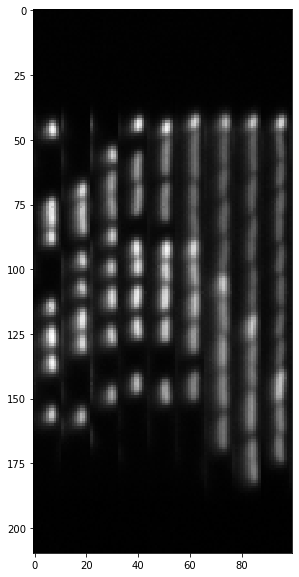

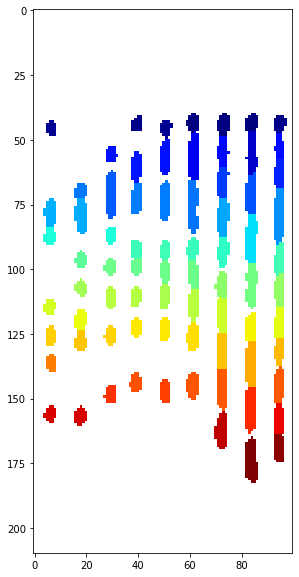

In [790]:
view = tr.kymo_handle()
view.import_wrap(img)
img = view.return_unwrap()

labels = test_seg.segment(data)
plt_img = np.ma.array(labels, mask=(labels==0))

plt.imshow(img,cmap="Greys_r",interpolation='nearest')
plt.show()

plt.imshow(plt_img,cmap="jet",interpolation='nearest')
plt.show()

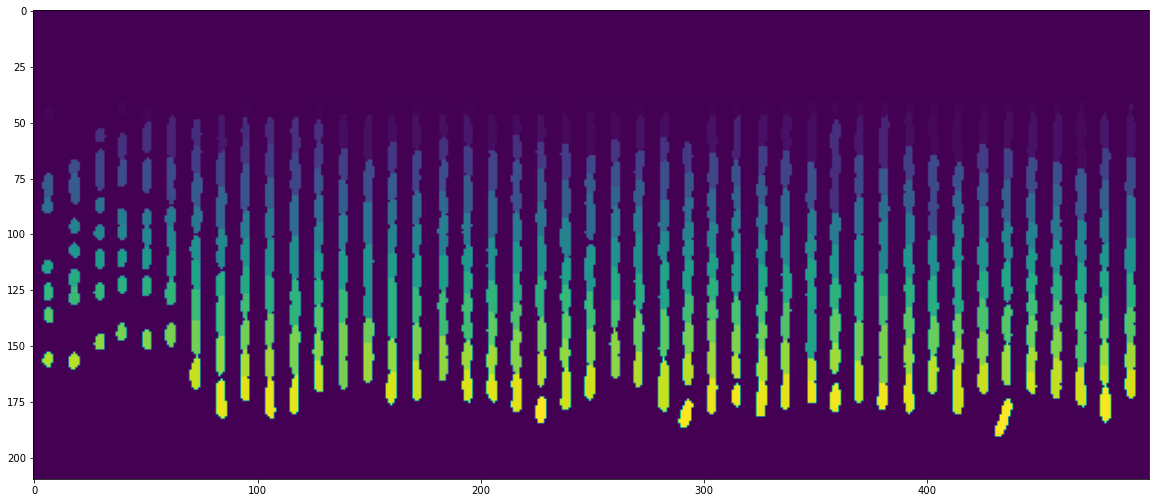

In [792]:
plt.imshow(seg_img[:,:500])

In [798]:
dask_controller = tr.trcluster.dask_controller(
    walltime="02:00:00",
    local=False,
    n_workers=100,
    memory="2GB",
    cores=1,
    working_directory=headpath + "/dask",
)
dask_controller.startdask()

In [799]:
dask_controller.displaydashboard()

In [806]:
segment = fluo_segmentation_cluster(headpath,seg_channel="mCherry",bit_max=20000,img_scaling=2.)

In [807]:
segment.dask_segment(dask_controller)

/home/de64/paulssonlab/paulssonlab/src/paulssonlab/deaton/trenchripper/trenchripper/utils.py:92: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.metadata = store.get_storer(key).attrs.metadata
distributed.utils - ERROR - addresses should be strings or tuples, got None
Traceback (most recent call last):
  File "/home/de64/miniconda3/envs/trenchripper/lib/python3.7/site-packages/distributed/utils.py", line 665, in log_errors
    yield
  File "/home/de64/miniconda3/envs/trenchripper/lib/python3.7/site-packages/distributed/scheduler.py", line 2136, in remove_worker
    address = self.coerce_address(address)
  File "/home/de64/miniconda3/envs/trenchripper/lib/python3.7/site-packages/distributed/scheduler.py", line 4845, in coerce_address
    raise TypeError("addresses should be strings or tuples, got %r" % (addr,))
TypeError: addresses should be strings or tuples, got None

In [804]:
dask_controller.daskclient.restart()

Client Scheduler: tcp://10.120.16.166:47694 Dashboard: http://10.120.16.166:8787/status,Cluster Workers: 19 Cores: 19 Memory: 38.00 GB


In [808]:
dask_controller.shutdown()

Future exception was never retrieved
future: <Future finished exception=CommClosedError("in <closed TCP>: Stream is closed: while trying to call remote method 'restart'")>
Traceback (most recent call last):
  File "/home/de64/miniconda3/envs/trenchripper/lib/python3.7/site-packages/distributed/comm/tcp.py", line 188, in read
    n_frames = await stream.read_bytes(8)
tornado.iostream.StreamClosedError: Stream is closed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/de64/miniconda3/envs/trenchripper/lib/python3.7/site-packages/distributed/core.py", line 686, in send_recv_from_rpc
    result = await send_recv(comm=comm, op=key, **kwargs)
  File "/home/de64/miniconda3/envs/trenchripper/lib/python3.7/site-packages/distributed/core.py", line 540, in send_recv
    response = await comm.read(deserializers=deserializers)
  File "/home/de64/miniconda3/envs/trenchripper/lib/python3.7/site-packages/distributed/comm/tcp.py", li

KeyboardInterrupt: 

In [ ]:
import h5py

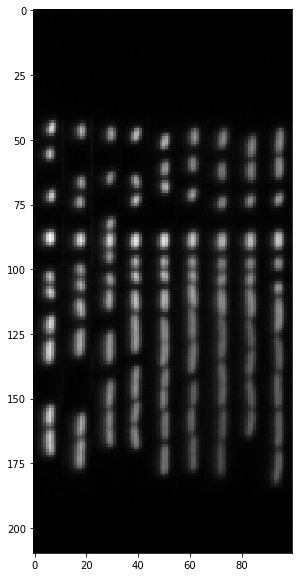

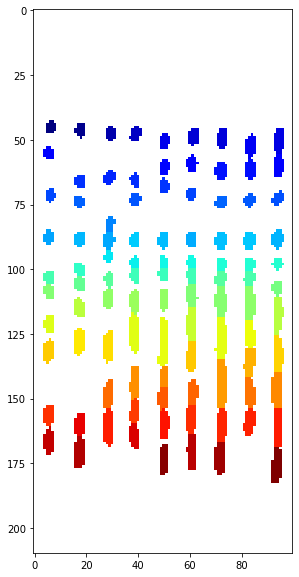

Task exception was never retrieved
future: <Task finished coro=<rpc.__getattr__.<locals>.send_recv_from_rpc() done, defined at /home/de64/miniconda3/envs/trenchripper/lib/python3.7/site-packages/distributed/core.py:678> exception=CommClosedError("in <closed TCP>: Stream is closed: while trying to call remote method 'restart'")>
Traceback (most recent call last):
  File "/home/de64/miniconda3/envs/trenchripper/lib/python3.7/site-packages/distributed/comm/tcp.py", line 188, in read
    n_frames = await stream.read_bytes(8)
tornado.iostream.StreamClosedError: Stream is closed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/de64/miniconda3/envs/trenchripper/lib/python3.7/site-packages/distributed/core.py", line 686, in send_recv_from_rpc
    result = await send_recv(comm=comm, op=key, **kwargs)
  File "/home/de64/miniconda3/envs/trenchripper/lib/python3.7/site-packages/distributed/core.py", line 540, in send_recv
    re

In [812]:
file = 2
idx = 11

with h5py.File("/n/scratch2/de64/2020-03-02_plasmid_loss/kymograph/kymograph_" + str(file) + ".hdf5","r") as infile:
    img = infile["mCherry"][idx]
with h5py.File("/n/scratch2/de64/2020-03-02_plasmid_loss/fluorsegmentation/segmentation_" + str(file) + ".hdf5","r") as infile:
    seg = infile["data"][idx]
    
view = tr.kymo_handle()
view.import_wrap(img)
img = view.return_unwrap()

view.import_wrap(seg)
seg = view.return_unwrap()
seg = np.ma.array(seg, mask=(seg==0))

plt.imshow(img[:,:100],cmap="Greys_r",interpolation='nearest')
plt.show()

plt.imshow(seg[:,:100],cmap="jet",interpolation='nearest')
plt.show()